https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [ ]:
import numpy as np 
import tensorflow as tf 
import pandas as pd 
#import category_encoders as ce
pd.options.mode.chained_assignment = None 
import seaborn as sns 
from matplotlib.pylab import rcParams 
import matplotlib.pyplot as plt
import os
# import plotly.express as px
# import plotly.graph_objects as go

# %matplotlib inline

In [ ]:
df1 = pd.read_csv('C:\Users\drish\OneDrive\Documents\EXTC\FYP\DATASET\binary_power_system\data1.csv')
df2 = pd.read_csv('C:\Users\drish\OneDrive\Documents\EXTC\FYP\DATASET\binary_power_system\data2.csv')
df3 = pd.read_csv('C:\Users\drish\OneDrive\Documents\EXTC\FYP\DATASET\binary_power_system\data3.csv')
df4 = pd.read_csv('C:\Users\drish\OneDrive\Documents\EXTC\FYP\DATASET\binary_power_system\data4.csv')
df5 = pd.read_csv('C:\Users\drish\OneDrive\Documents\EXTC\FYP\DATASET\binary_power_system\data5.csv')

df = df1.append([df2,df3,df4,df5])
#from google.colab import files
#uploaded = files.upload()
df.shape

SyntaxError: ignored

In [ ]:
path = r'C:\Users\drish\OneDrive\Documents\EXTC\FYP\DATASET\binary_power_system'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one

ValueError: ignored

In [ ]:
df = pd.read_csv('combined_binary.csv') #comment out this block if not uploading via computer
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,...,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.3993,127673,-49.5723,127648,-169.578,127723,65.6896,605.911,-57.0036,626.786,-173.589,602.432,70.4222,127673,0,0,0,0,65.0078,611.587,118.568,13.1839,-100.869,13.9164,59.999,0.01,6.39138,0.0762905,0,60.6583,124632,-59.296,124484,-179.338,124715,-119.55,612.797,117.727,632.532,0.85968,...,-49.5379,127096,-169.532,127773,65.6438,604.446,-56.8718,621.842,-173.87,599.868,70.4623,127523,0,0,0,0,64.9505,608.475,119.301,12.2684,-102.061,11.719,59.999,0.01,6.34183,0.0778972,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,73.6881,130281,-46.3007,130256,-166.278,130356,71.8317,483.594,-50.9474,500.989,-167.487,481.396,73.7053,130306,0,0,0,0,71.1098,488.354,125.793,10.6204,-95.8845,11.3528,60.005,0,8.18546,0.0249238,0,66.069,128277,-53.8852,128126,-173.933,128355,-114.925,489.349,122.149,505.754,5.46844,...,-46.2492,129704,-166.232,130381,71.8374,481.762,-50.7927,496.045,-167.619,477.734,73.7569,130130,0,0,0,0,71.1213,485.058,124.275,10.2542,-95.4548,9.70483,60.005,0,8.14133,0.0272096,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,73.7339,130306,-46.2549,130281,-166.232,130381,71.8088,483.594,-50.913,500.989,-167.441,481.03,73.7511,130331,0,0,0,0,71.1327,488.354,125.008,10.6204,-94.5208,11.3528,60.005,0,8.19001,0.0279035,0,66.113,128284,-53.8522,128144,-173.883,128383,-114.92,488.886,122.215,505.531,5.46295,...,-46.1976,129729,-166.192,130381,71.8661,481.396,-50.7812,496.411,-167.59,478.1,73.797,130155,0,0,0,0,71.1442,485.241,125.277,10.2542,-95.9704,10.071,60.005,0,8.16276,0.0266635,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
3,74.0834,130582,-45.8996,130557,-165.883,130657,72.1526,482.861,-50.4375,499.158,-167.286,481.396,74.1064,130582,0,0,0,0,71.4593,487.622,127.598,9.70483,-96.658,10.4373,60.003,0,8.17153,0.025617,0,66.5085,128585,-53.4457,128443,-173.488,128673,-114.815,489.864,122.649,504.227,5.69366,...,-45.8481,129980,-165.837,130682,72.1812,481.213,-50.3114,494.763,-167.395,478.283,74.1522,130431,0,0,0,0,71.4822,484.692,126.475,9.33861,-97.2539,9.1555,60.003,0,8.13529,0.0265955,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
4,74.5533,131083,-45.4241,131058,-165.424,131158,72.1182,484.509,-50.0135,497.693,-167.464,484.692,74.5705,131108,0,0,0,0,71.5395,488.904,127.666,7.50751,-99.9238,8.60617,60.001,0,8.0795,0.0329408,0,67.0358,129107,-52.9129,128975,-172.95,129197,-114.92,491.295,123.072,502.499,5.41351,...,-45.3725,130506,-165.373,131183,72.164,482.861,-49.8817,493.115,-167.602,481.213,74.6278,130933,0,0,0,0,71.5567,485.608,126.595,7.3244,-101.711,7.14129,60.001,0,8.03602,0.0336413,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural


In [ ]:
df.shape

(78392, 129)

In [ ]:
X1 = df.drop(['marker'],axis = 1,inplace=False)
y = df.marker
X1.head()
#print(X1.max())

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,...,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,70.3993,127673,-49.5723,127648,-169.578,127723,65.6896,605.911,-57.0036,626.786,-173.589,602.432,70.4222,127673,0,0,0,0,65.0078,611.587,118.568,13.1839,-100.869,13.9164,59.999,0.01,6.39138,0.0762905,0,60.6583,124632,-59.296,124484,-179.338,124715,-119.55,612.797,117.727,632.532,0.85968,...,127723,-49.5379,127096,-169.532,127773,65.6438,604.446,-56.8718,621.842,-173.87,599.868,70.4623,127523,0,0,0,0,64.9505,608.475,119.301,12.2684,-102.061,11.719,59.999,0.01,6.34183,0.0778972,0,0,0,0,0,0,0,0,0,0,0,0,0
1,73.6881,130281,-46.3007,130256,-166.278,130356,71.8317,483.594,-50.9474,500.989,-167.487,481.396,73.7053,130306,0,0,0,0,71.1098,488.354,125.793,10.6204,-95.8845,11.3528,60.005,0,8.18546,0.0249238,0,66.069,128277,-53.8852,128126,-173.933,128355,-114.925,489.349,122.149,505.754,5.46844,...,130331,-46.2492,129704,-166.232,130381,71.8374,481.762,-50.7927,496.045,-167.619,477.734,73.7569,130130,0,0,0,0,71.1213,485.058,124.275,10.2542,-95.4548,9.70483,60.005,0,8.14133,0.0272096,0,0,0,0,0,0,0,0,0,0,0,0,0
2,73.7339,130306,-46.2549,130281,-166.232,130381,71.8088,483.594,-50.913,500.989,-167.441,481.03,73.7511,130331,0,0,0,0,71.1327,488.354,125.008,10.6204,-94.5208,11.3528,60.005,0,8.19001,0.0279035,0,66.113,128284,-53.8522,128144,-173.883,128383,-114.92,488.886,122.215,505.531,5.46295,...,130356,-46.1976,129729,-166.192,130381,71.8661,481.396,-50.7812,496.411,-167.59,478.1,73.797,130155,0,0,0,0,71.1442,485.241,125.277,10.2542,-95.9704,10.071,60.005,0,8.16276,0.0266635,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74.0834,130582,-45.8996,130557,-165.883,130657,72.1526,482.861,-50.4375,499.158,-167.286,481.396,74.1064,130582,0,0,0,0,71.4593,487.622,127.598,9.70483,-96.658,10.4373,60.003,0,8.17153,0.025617,0,66.5085,128585,-53.4457,128443,-173.488,128673,-114.815,489.864,122.649,504.227,5.69366,...,130632,-45.8481,129980,-165.837,130682,72.1812,481.213,-50.3114,494.763,-167.395,478.283,74.1522,130431,0,0,0,0,71.4822,484.692,126.475,9.33861,-97.2539,9.1555,60.003,0,8.13529,0.0265955,0,0,0,0,0,0,0,0,0,0,0,0,0
4,74.5533,131083,-45.4241,131058,-165.424,131158,72.1182,484.509,-50.0135,497.693,-167.464,484.692,74.5705,131108,0,0,0,0,71.5395,488.904,127.666,7.50751,-99.9238,8.60617,60.001,0,8.0795,0.0329408,0,67.0358,129107,-52.9129,128975,-172.95,129197,-114.92,491.295,123.072,502.499,5.41351,...,131133,-45.3725,130506,-165.373,131183,72.164,482.861,-49.8817,493.115,-167.602,481.213,74.6278,130933,0,0,0,0,71.5567,485.608,126.595,7.3244,-101.711,7.14129,60.001,0,8.03602,0.0336413,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X1 / X1.max() #Normalization
X.head()
#X.tail()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,...,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
78387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X.dropna(axis = 1,inplace=True)

In [ ]:
assert not np.any(np.isnan(X))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y


TypeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(7)
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.1, random_state=42)
print(X_train.shape," ",y_test.shape)
input_shape = X_train.shape[1]
print(input_shape)

(23231, 120)   (2582,)
120


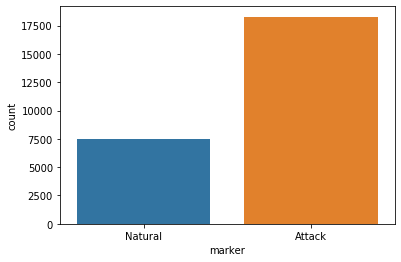

In [ ]:
import seaborn as sns
ax = sns.countplot(x='marker',data=df)

In [ ]:
import os,datetime
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Dropout,LSTM

In [ ]:
X_train_3d = np.reshape(X_train.values,(X_train.shape[0],1,X_train.shape[1]))
X_test_3d = np.reshape(X_test.values,(X_test.shape[0],1,X_test.shape[1]))
print(X_train_3d.shape," ",X_test_3d.shape )


(23231, 1, 120)   (2582, 1, 120)


In [ ]:
input_df = Input( shape = (input_shape, ))

x = Dense(64, activation = 'relu')(input_df)
# x = Dense(32, activation = 'relu', kernel_initializer='glorot_uniform')(x)
# x = Dense(16, activation = 'relu', kernel_initializer='glorot_uniform')(x)
# x = Dense(4, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(1, activation = 'relu', kernel_initializer='glorot_uniform')(x)
# x = Dense(4, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
# x = Dense(16, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(input_shape, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
opt = tf.keras.optimizers.Adam(lr=1e-3)

autoencoder.compile(optimizer = opt, loss = 'mean_squared_error')

model = Sequential()
model.add(LSTM(64,input_shape=(X_train_3d.shape[1:]),activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.RMSprop(lr=1e-3)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)

In [ ]:
autoencoder.fit(X_train,X_train,epochs=1000,validation_data=(X_test,X_test),verbose=1)#allbacks=[tensorboard_callback])

Train on 23231 samples, validate on 2582 samples
Epoch 1/1000
23231/23231 [==============================] - 5s 232us/sample - loss: 0.0241 - val_loss: 0.0054
Epoch 2/1000
23231/23231 [==============================] - 5s 216us/sample - loss: 0.0034 - val_loss: 0.0024
Epoch 3/1000
23231/23231 [==============================] - 5s 227us/sample - loss: 0.0017 - val_loss: 0.0014
Epoch 4/1000
23231/23231 [==============================] - 5s 215us/sample - loss: 0.0012 - val_loss: 0.0011
Epoch 5/1000
23231/23231 [==============================] - 5s 220us/sample - loss: 9.1738e-04 - val_loss: 9.1654e-04
Epoch 6/1000
23231/23231 [==============================] - 5s 223us/sample - loss: 7.2850e-04 - val_loss: 7.6126e-04
Epoch 7/1000
23231/23231 [==============================] - 5s 211us/sample - loss: 6.0797e-04 - val_loss: 6.8202e-04
Epoch 8/1000
23231/23231 [==============================] - 5s 206us/sample - loss: 5.1686e-04 - val_loss: 5.7259e-04
Epoch 9/1000
23231/23231 [=============

KeyboardInterrupt: 

1) previously there was an error: the losses were 'nan', because in input data inself there was 'nan', I removed       it and now losses are showing.
2) 2nd problem occured when Network was not learning. i.e. at every Epoch the Accuracies were exactly same. I increased the learning rate from 1e-5 to 1e-2. Increasing Learning Rate will definately boost the learning and it works!!!


losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss','accuracy','val_accuracy']].plot()


In [ ]:
def calc_accuracy(y,y_pred):
    count = 0
    precount=0
    m = int(y.max())
    shape = y.shape[0]
    for j in range(0,m,1):
        for i in range(0,shape-1):
            if (y[i]> j and y_pred[i]==1):
                count = count + 1
            if (y[i]< j and y_pred[i]==0):
                count = count + 1
        if count > precount:
            print(count," pre= ",precount)
            precount = count
        else:
            print(count)
        count=0
    return (precount/shape)

In [ ]:
pred = encoder.predict(X_train)
pred

array([[-0.],
       [-0.],
       [-0.],
       ...,
       [-0.],
       [-0.],
       [-0.]], dtype=float32)

In [ ]:
pred = pd.DataFrame(pred,columns=['pred'])
y_train= pd.DataFrame(y_train,columns=['y_train'])
pred = pred*100
pred.describe()

,pred
count,23231.000000
mean,0.006809
std,1.037842
min,-0.000000
25%,-0.000000
50%,-0.000000
75%,-0.000000
max,158.185959


In [ ]:
print(calc_accuracy(pred.values,y_train.values))

1  pre=  0
16454  pre=  1
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
16454
0.7082777323404073
